<img src="tec-logo.jpg" width=200> 

<img src="ES_fig1.png" width=800> 


In [21]:
using JuMP, Clp, Plots, Printf

#### Energy demand [kWh] in a 24 h working period and Amount of energy available [kWh] from a Solar Photovoltaic plant facility

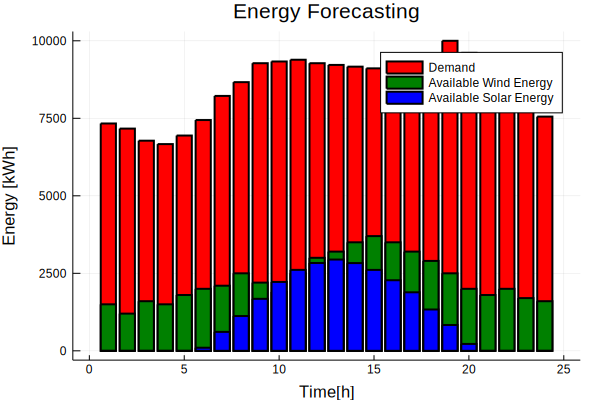

In [22]:
Demand  = ones(24)
Epvprod = ones(24)
Wd      = ones(24)
Demand  = [7333; 7168; 6778; 6668; 6944; 7444; 8222; 8666; 9277; 9333; 9389; 9277; 9222; 9166; 9111;  
           9166; 9277; 9500; 10000; 9611; 9277; 8333; 8111; 7555]
Epvprod = [0; 0; 0; 0; 0; 100; 611; 1122; 1677; 2222; 2611; 2833; 2944; 2830; 2610; 2277; 1888; 1333;
           833; 222; 0; 0; 0; 0];
Wd  = [1500; 1200; 1600; 1500; 1800; 2000; 2100; 2500; 2200; 1900; 2500; 3000; 3200; 3500; 3700; 
       3500; 3200; 2900; 2500; 2000; 1800; 2000; 1700; 1600]

plot(Demand, color=:red,line = :bar, title="Energy Forecasting",label="Demand",lw=2,xlabel="Time[h]",ylabel="Energy [kWh]")
plot!(Wd, color=:green,line = :bar, label="Available Wind Energy",lw=2)
plot!(Epvprod, color=:blue,line = :bar, label="Available Solar Energy",lw=2)

In [43]:
dt     = 1               # Interval size for time discretization [h] 
time   = 24              # 24 hrs in a day
eta    = 1
np     = convert(Int64, time/dt)
ni     = 1:np
Bmax   = 20000           # Maximum amount of stored energy [kWh]
Bmin   = 0.3*Bmax        # Minimum amount of stored energy [kWh]
Bstart = 0.7*Bmax        # Amount of initial stored energy
Epvch  = 2000            # Maximum battery energy charge [kWh] 
Ebdch  = 4000            # Maximn battery energy discharge [kWh]
Pc     = ones(np)        # Net Conventional power plant profit [$/kWh] 
Ppv    = ones(np)        # Net Photovoltaic solar plant profit [$/kWh]
Pb     = ones(np)        # Net Battery profit [$/kWh]
Pw     = ones(np)        # Net Battery profit [$/kWh]
H      = 0.1150*ones(np) # Gross Energy profit [$/kWh]
Cpv    = 0.01*ones(np)   # Cost of solar photovoltaic energy [$/kWh]
Cb     = 0.011*ones(np)  # Cost of battery stored energy
Cw     = 0.0095*ones(np)  # Cost of wind power [$/kWh]
for j  = 1:np
    Pc[j]  = H[j]-max(0.08,0.1*Demand[j]/maximum(Demand))
    Ppv[j] = Cpv[j]
    Pb[j]  = Cb[j]
    Pw[j]  = Cw[j]
end

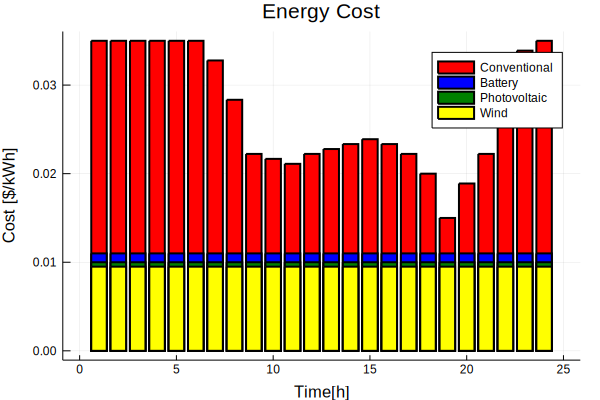

In [46]:
plot(Pc, color=:red,title="Energy Cost",line = :bar, label="Conventional",lw=2,xlabel="Time[h]",ylabel="Cost [\$/kWh]")
plot!(Pb, color=:blue,line = :bar, label="Battery",lw=2)
plot!(Ppv, color=:green,line = :bar, label="Photovoltaic",lw=2)
plot!(Pw, color=:yellow,line = :bar, label="Wind",lw=2)